<a href="https://colab.research.google.com/github/Fabriloko/Machine_Learn/blob/main/Lista5_Fabricio_414900.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
penguin_dataset = np.genfromtxt('/content/penguins.csv',delimiter=',')
quake_dataset = np.genfromtxt('/content/quake.csv',delimiter=',')

# **Funções Uteis**

In [ ]:
# Dividir os dados em treino e teste
def dividir_treino_teste(dados):
  np.random.shuffle(dados)
  X_treino = dados[:,:-1][:int(len(dados)*0.7)]
  X_teste  = dados[:,:-1][int(len(dados)*0.7):]
  y_treino = dados[:,[-1]][:int(len(dados)*0.7)]
  y_teste  = dados[:,[-1]][int(len(dados)*0.7):]
  return y_treino,y_teste,X_treino, X_teste

# Normalizacao 0 ou 1
class normalize_01():
  def __init__(self, X):
    self.min = np.min(X,axis=0)
    self.max = np.max(X,axis=0)
  def norma(self, X):
    return (X - self.min)/(self.max - self.min)
  def desnorm(self, X):
    return X * (self.max - self.min) + self.min

# **Questão 1**

In [ ]:
def K_Means(dados, K):
  iteracoes = 10

  np.random.shuffle(dados)
  X_Cluster = dados # Dados do Cluster
  Normalize_X = normalize_01(X_Cluster)
  X_Cluster = Normalize_X.norma(X_Cluster)

  # Centroide do Cluster k
  m_k = np.array((X_Cluster[0],X_Cluster[1],X_Cluster[3],X_Cluster[2]))

  for i in range(iteracoes):  
    # Partições de Clusters
    C_k = np.zeros(len(X_Cluster))#np.array((X_Cluster[0],X_Cluster[1],X_Cluster[3],X_Cluster[2]))

    for j in range(len(X_Cluster)):
      distancias = []
      for k in range(K):
        # X_Cluster próximos do centroide m_k
        aux = np.sqrt(np.sum((X_Cluster[j] - m_k[k]) ** 2, axis= 0))
        distancias.append(aux)
      C = np.argmin(distancias)
      C_k[j] = C # Indice dos dados que pertecem ao Cluster k

    for k in range(K):
      for j in range(len(X_Cluster)):
        if C_k[j] == k:
          J = np.sqrt(np.sum(X_Cluster[j] - m_k[k]) ** 2) # Erro de Reconstrução

            # Atualização de Centroides
          m_k[k] = np.mean(X_Cluster[j], axis= 0) # Cada posição é um centroide co Cluster k

    # delta = np.sum(np.abs(X - m)) / len(C_k)
    # Delta = np.abs(m_Cluster - m_Cluster)
    # DP = 

  return C_k, J

# K = [n for n in range(4, 21)]
# Exp_Var = []
# for m in K:
C, Custo = K_Means(quake_dataset, 4)

# **Questão 2**

In [ ]:
def PCA(X, M):
  # Normalização dos Dados
  # np.random.shuffle(X)
  normalize_X = normalize_01(X)
  X = normalize_X.norma(X)

  # Calculando Média e Matriz de Covariância dos Dados
  mu_X = np.mean(X, axis=0)
  var_X = np.cov(X.T)

  # Determinando autovalores e autovetores
  autovalores, autovetores = np.linalg.eigh(var_X) 

  A = autovalores[autovalores.shape[0] - M: autovalores.shape[0]]
  P = autovetores[:, autovetores.shape[1] - M: autovetores.shape[1]]
  # Projetando os valores de X na dimensão M
  Z = (X - mu_X) @ P

  var_exp = np.sum(A)

  return var_exp, Z


Variancia Explicativa para 1 dimensoes é 0.13992555145892094
Variancia Explicativa para 2 dimensoes é 0.17844709752107102
Variancia Explicativa para 3 dimensoes é 0.19518868248322488
Variancia Explicativa para 4 dimensoes é 0.2009655821695459




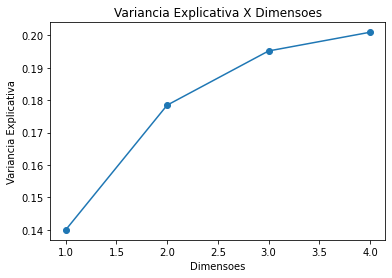

In [ ]:
y = penguin_dataset[:, [-1]]
X = penguin_dataset[:,:-1]

dim = (1, 2, 3, 4)
Exp_Var = []
for m in dim:
  var_exp, Z= PCA(X, m)
  Exp_Var.append(var_exp)
  print(f"Variancia Explicativa para {m} dimensoes é {var_exp}")

print("\n")
plt.plot(dim, Exp_Var, '-o');
plt.xlabel("Dimensoes")
plt.ylabel("Variancia Explicativa")
plt.title("Variancia Explicativa X Dimensoes")
plt.plot();